# FDA_practice - part 2

## Dataset Overview

- Dataset: Google Play Store Apps
- Dataset download link: https://www.kaggle.com/lava18/google-play-store-apps
- Dataset description:
    About 10k Play Store apps. Each app (row) has values for name, catergory, rating, size, number of reviews, number of installs, type(free or paid), price, content rating, genres, last updated time, current app version, and supported android version.
    
## Instruction
The data `googleplaystore.csv` should be put in the same directory with this ipynb file.

## 1. A peek at the data

In [413]:
import pandas as pd

data_file_path = './googleplaystore.csv'
df = pd.read_csv(data_file_path)

print('*data shape:')
print(df.shape)

print('\n*data head:')
print(df.head())

*data shape:
(10841, 13)

*data head:
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018          

## 2. Data Cleaning

In [414]:
# Drop unnecessary columns

print(df.shape)
df.drop(columns=['Current Ver'], inplace=True)
print(df.shape)


# Drop the rows which don't have `Rating` or `Android Ver`.

df.dropna(subset=['Rating'], inplace=True)
print(df.shape)
df.dropna(subset=['Android Ver'], inplace=True)
print(df.shape)

(10841, 13)
(10841, 12)
(9367, 12)
(9364, 12)


In [415]:
# Correct data type

print(type(df.Reviews[0]))
df['Reviews'] = df['Reviews'].apply(lambda x: int(x))
print(type(df.Reviews[0]))
# print(df.Reviews.isnull().values.any())

<class 'str'>
<class 'numpy.int64'>


In [416]:
# Convert `Price` from type `str` to type `float`

print(type(df.Price[0]))
print(df['Price'].unique())

df['Price'] = df['Price'].apply(lambda x: float(x.strip('$')))

print('\n')
print(type(df.Price[0]))
print(df['Price'].unique())

<class 'str'>
['0' '$4.99' '$3.99' '$6.99' '$7.99' '$5.99' '$2.99' '$3.49' '$1.99'
 '$9.99' '$7.49' '$0.99' '$9.00' '$5.49' '$10.00' '$24.99' '$11.99'
 '$79.99' '$16.99' '$14.99' '$29.99' '$12.99' '$2.49' '$10.99' '$1.50'
 '$19.99' '$15.99' '$33.99' '$39.99' '$3.95' '$4.49' '$1.70' '$8.99'
 '$1.49' '$3.88' '$399.99' '$17.99' '$400.00' '$3.02' '$1.76' '$4.84'
 '$4.77' '$1.61' '$2.50' '$1.59' '$6.49' '$1.29' '$299.99' '$379.99'
 '$37.99' '$18.99' '$389.99' '$8.49' '$1.75' '$14.00' '$2.00' '$3.08'
 '$2.59' '$19.40' '$3.90' '$4.59' '$15.46' '$3.04' '$13.99' '$4.29'
 '$3.28' '$4.60' '$1.00' '$2.95' '$2.90' '$1.97' '$2.56' '$1.20']


<class 'numpy.float64'>
[  0.     4.99   3.99   6.99   7.99   5.99   2.99   3.49   1.99   9.99
   7.49   0.99   9.     5.49  10.    24.99  11.99  79.99  16.99  14.99
  29.99  12.99   2.49  10.99   1.5   19.99  15.99  33.99  39.99   3.95
   4.49   1.7    8.99   1.49   3.88 399.99  17.99 400.     3.02   1.76
   4.84   4.77   1.61   2.5    1.59   6.49   1.29 299.99

In [417]:
# Convert `Size` to type `float`

def convertSize(str):
    try:
        if('M' in str):
            return float(str.strip('M'))
        elif('k' in str):
            return float(str.strip('k'))*0.001
    except ValueError:
        return None

print(df['Size'].head())
df['Size'] = df['Size'].apply(lambda x: convertSize(x))
print(df['Size'].head())

0     19M
1     14M
2    8.7M
3     25M
4    2.8M
Name: Size, dtype: object
0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
Name: Size, dtype: float64


In [418]:
# Convert `Installs` to type `float`

print(df['Installs'].head())
df['Installs'] = df['Installs'].apply(lambda x: float(x.replace(',', '').strip('+')))
print(df['Installs'].head())

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object
0       10000.0
1      500000.0
2     5000000.0
3    50000000.0
4      100000.0
Name: Installs, dtype: float64


In [419]:
# Convert `Last Updated` to numeric data which represent number of seconds
# from the time the dataset was uploaded(2018-9-3 00:00:00).

from datetime import datetime

print(df['Last Updated'].head())
current_time = datetime(2018, 9, 3, 0, 0).timestamp()
df['Last Updated'] = df['Last Updated'].apply(lambda x: current_time-datetime.strptime(x, '%B %d, %Y').timestamp())
print(df['Last Updated'].head())

0     January 7, 2018
1    January 15, 2018
2      August 1, 2018
3        June 8, 2018
4       June 20, 2018
Name: Last Updated, dtype: object
0    20649600.0
1    19958400.0
2     2851200.0
3     7516800.0
4     6480000.0
Name: Last Updated, dtype: float64


### 3. Create Data

In [420]:
#### Create Data - revenue = price * number of installs
df.loc[:, 'Revenue'] = df['Price'] * df['Installs']
print(df.loc[2400:2405, ['App', 'Price', 'Installs', 'Revenue']])

                                               App  Price  Installs  Revenue
2400                                   AnatomyMapp  14.99    5000.0  74950.0
2401                       Diabetes & Diet Tracker   9.99    1000.0   9990.0
2402                       A Manual of Acupuncture  33.99    1000.0  33990.0
2403  5 Minute Veterinary Consult: Canine & Feline   0.00    1000.0      0.0
2404                      Wide address pocket prep   0.00    5000.0      0.0
2405                               Nursing Central   0.00   10000.0      0.0


## 3. Plot the data

### Rating distribution

Rating description:
count    9364.000000
mean        4.191702
std         0.515260
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64


Text(0, 0.5, 'Count')

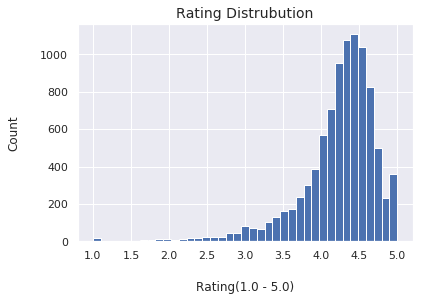

In [423]:
print('Rating description:')
print(df['Rating'].describe())


# Plot the rating distribution.

rating_hist_ax = df['Rating'].hist(bins=len(df['Rating'].unique()))


# Set title

rating_hist_ax.set_title("Rating Distrubution", size=14)


# Set x-axis, y-axis label

rating_hist_ax.set_xlabel("Rating(1.0 - 5.0)", labelpad=20, size=12)
rating_hist_ax.set_ylabel("Count", labelpad=20, size=12)

### Explanation
The average rating is 4.191702 .
Ratings of Half of the apps range from 4.0 to 4.5

### Heatmap

(9364, 13)
(7727, 13)


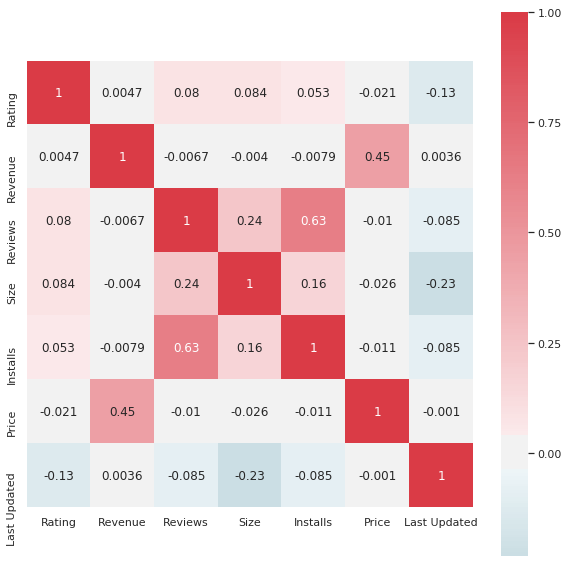

In [424]:
import seaborn as sns
import matplotlib.pyplot as plt


# Drop rows which contain null values and compute the correlation matrix

print(df.shape)
temp_data = df.dropna(subset=['Size'])
print(temp_data.shape)
numeric_data = temp_data[['Rating', 'Revenue', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated']]
corr = numeric_data.corr()


# Generate a custom colormap

sns.set()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
fig, heatmap_ax = plt.subplots(figsize=(10,10))


# Draw the heatmap with the mask and correct aspect ratio

sns.heatmap(corr, cmap=cmap, vmax=1, center=0, square=True, linewidths=0, annot=True, ax=heatmap_ax)

### Explanation
According to the heatmap above, the number of installs is closely related to the number of reviews, which makes sense because the more users using an app, the more chances an app would get a feedback.

And it's fair to see the revenue of apps are higher if the prices are high. But there's no clear relations between the number of installs and the revenue, that's because most apps are free. For example, a high-rating free app with many installs but no revenue. In this situation, the heatmap can't really show the correlation between the two factors. We should deal with the problem later.

Sizes of apps have a negative relation with duration since last updated because the size of an app often gets larger every time it's updated. If an app is frequently updated, then its size may be larger than other apps which are not frequently updated.

Sizes of apps seem to have a positive relation with number of reviews. Though I can't figure out the reason why yet.

There's no other obvious evidence showing the relations between any other two factors, this might due to the outliers in the data, so we should take other methods to get a little more insight.

### Put free apps aside.

According to the plot above, we can see there is a large proportion of apps which are free. If we want to see the correlation related to the revenues, we should put aside the free apps.

Text(0, 0.5, 'Count (log)')

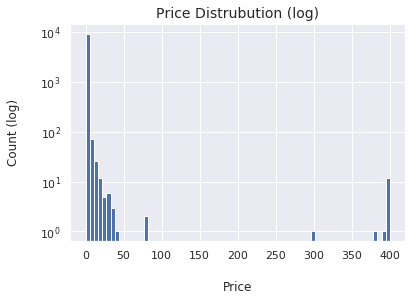

In [425]:
# Plot the price distribution.

price_hist_ax = df['Price'].hist(bins=len(df['Price'].unique()), log=True)


# Set title

price_hist_ax.set_title("Price Distrubution (log)", size=14)


# Set x-axis, y-axis label

price_hist_ax.set_xlabel("Price", labelpad=20, size=12)
price_hist_ax.set_ylabel("Count (log)", labelpad=20, size=12)

(646, 13)
(578, 13)


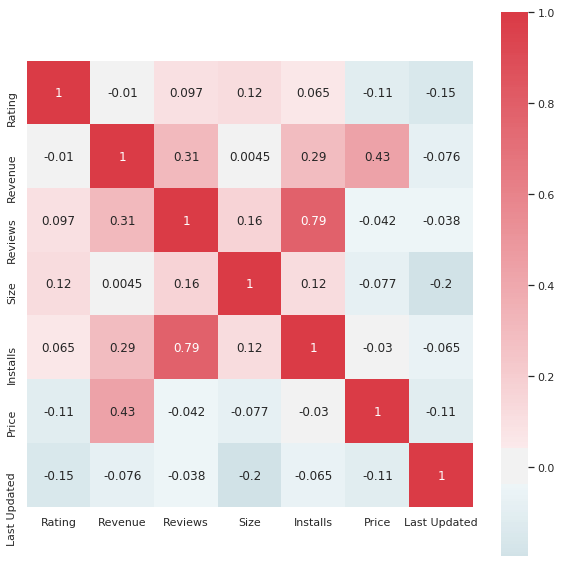

In [426]:
# Drop apps which are free.

paid_apps = df[df['Price']>0]
print(paid_apps.shape)


# Drop rows which contain null values and compute the correlation matrix

temp_data = paid_apps.dropna(subset=['Size'])
print(temp_data.shape)
numeric_data = temp_data[['Rating', 'Revenue', 'Reviews', 'Size', 'Installs', 'Price', 'Last Updated']]
corr = numeric_data.corr()


# Generate a custom colormap

sns.set()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
fig, heatmap_ax = plt.subplots(figsize=(10,10))


# Draw the heatmap with the mask and correct aspect ratio

sns.heatmap(corr, cmap=cmap, vmax=1, center=0, square=True, linewidths=0, annot=True, ax=heatmap_ax)

### Explanation
After filter out the free apps, then we can see from the heatmap that revenues has clear positive relations with prices, number of installs and reviews.

### Price & Rating

Text(0.5, 1.0, 'Price VS Rating(Both free and paid apps)')

<Figure size 720x720 with 0 Axes>

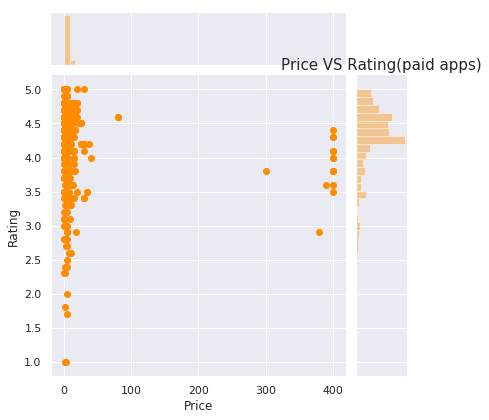

<Figure size 720x720 with 0 Axes>

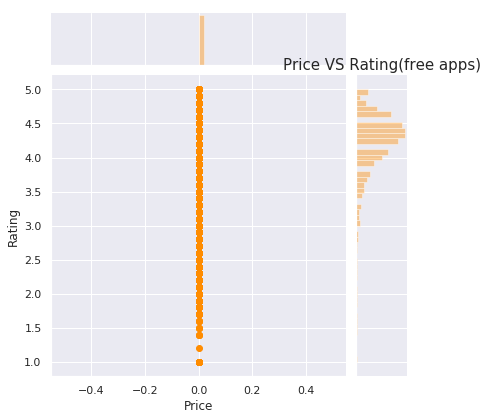

<Figure size 720x720 with 0 Axes>

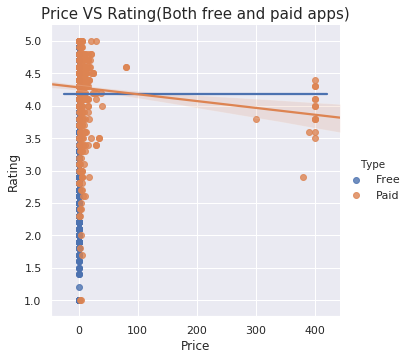

In [427]:
plt.figure(figsize = (10,10))
sns.jointplot(x="Price", y="Rating", color = 'darkorange', data=paid_apps)
plt.title('Price VS Rating(paid apps)',size = 15)

plt.figure(figsize = (10,10))
sns.jointplot(x="Price", y="Rating", color = 'darkorange', data=df[df['Price']==0])
plt.title('Price VS Rating(free apps)',size = 15)

plt.figure(figsize = (10,10))
sns.lmplot(x="Price", y="Rating", data=df, hue='Type')
plt.title('Price VS Rating(Both free and paid apps)',size = 15)

### Explanation
The plot above shows that the apps which are really expensive have decent ratings range from about 3.0 to 4.5 . But cheaper apps could get higher ratings. Especially over half of the free apps can get ratings larger than 4.0 .

### What are these expensive apps for?

In [428]:
expensive_apps = df[df['Price']>200]
print(expensive_apps[['App', 'Category', 'Price', 'Installs', 'Rating', 'Revenue', 'Reviews']])

                                 App   Category   Price  Installs  Rating  \
4197          most expensive app (H)     FAMILY  399.99     100.0     4.3   
4362                      💎 I'm rich  LIFESTYLE  399.99   10000.0     3.8   
4367        I'm Rich - Trump Edition  LIFESTYLE  400.00   10000.0     3.6   
5351                       I am rich  LIFESTYLE  399.99  100000.0     3.8   
5354                  I am Rich Plus     FAMILY  399.99   10000.0     4.0   
5355                   I am rich VIP  LIFESTYLE  299.99   10000.0     3.8   
5356               I Am Rich Premium    FINANCE  399.99   50000.0     4.1   
5357             I am extremely Rich  LIFESTYLE  379.99    1000.0     2.9   
5358                      I am Rich!    FINANCE  399.99    1000.0     3.8   
5359              I am rich(premium)    FINANCE  399.99    5000.0     3.5   
5362                   I Am Rich Pro     FAMILY  399.99    5000.0     4.4   
5364  I am rich (Most expensive app)    FINANCE  399.99    1000.0     4.1   

### Explanation
After googling these apps, for example: https://play.google.com/store/apps/details?id=kritrim.inc.iamrich

It looks like these expensive apps have functions of showing off, so people have good reasons buying them. And all of these apps do have high revenues. Though the number of installs are not very high comparing to the other famous apps, but still enough for making some money.

### What kind of apps have higher ratings?
Take a look at the top 17% rating apps.

(1917, 13)


[Text(0, 0, 'ART_AND_DESIGN'),
 Text(0, 0, 'AUTO_AND_VEHICLES'),
 Text(0, 0, 'BEAUTY'),
 Text(0, 0, 'BOOKS_AND_REFERENCE'),
 Text(0, 0, 'BUSINESS'),
 Text(0, 0, 'COMICS'),
 Text(0, 0, 'COMMUNICATION'),
 Text(0, 0, 'DATING'),
 Text(0, 0, 'EDUCATION'),
 Text(0, 0, 'ENTERTAINMENT'),
 Text(0, 0, 'EVENTS'),
 Text(0, 0, 'FINANCE'),
 Text(0, 0, 'FOOD_AND_DRINK'),
 Text(0, 0, 'HEALTH_AND_FITNESS'),
 Text(0, 0, 'HOUSE_AND_HOME'),
 Text(0, 0, 'LIBRARIES_AND_DEMO'),
 Text(0, 0, 'LIFESTYLE'),
 Text(0, 0, 'GAME'),
 Text(0, 0, 'FAMILY'),
 Text(0, 0, 'MEDICAL'),
 Text(0, 0, 'SOCIAL'),
 Text(0, 0, 'SHOPPING'),
 Text(0, 0, 'PHOTOGRAPHY'),
 Text(0, 0, 'SPORTS'),
 Text(0, 0, 'TRAVEL_AND_LOCAL'),
 Text(0, 0, 'TOOLS'),
 Text(0, 0, 'PERSONALIZATION'),
 Text(0, 0, 'PRODUCTIVITY'),
 Text(0, 0, 'PARENTING'),
 Text(0, 0, 'WEATHER'),
 Text(0, 0, 'VIDEO_PLAYERS'),
 Text(0, 0, 'NEWS_AND_MAGAZINES'),
 Text(0, 0, 'MAPS_AND_NAVIGATION')]

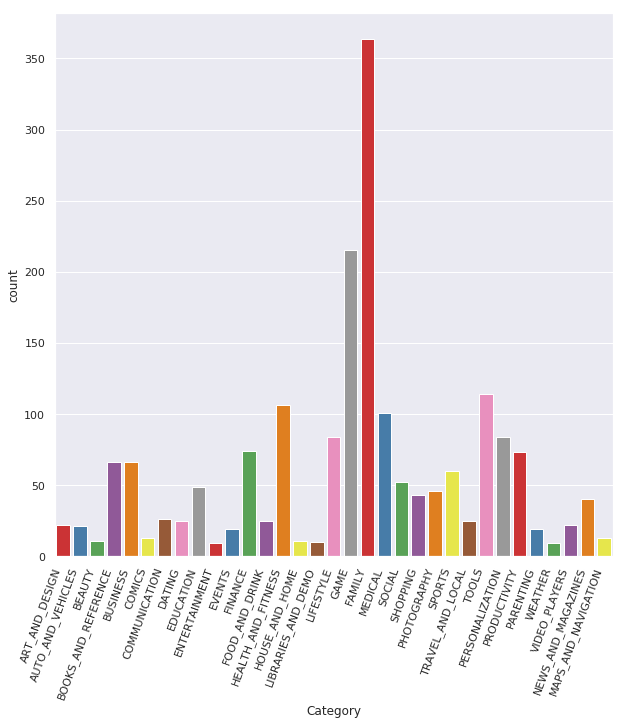

In [429]:
# Get the data of apps which has the rating score larger than 4.5 .

top_apps = df[df['Rating']>4.5]
print(top_apps.shape)


# Plot the category distribution of high-rating apps.

fig, ax = plt.subplots(figsize=(10,10))
g = sns.countplot(x="Category",data=top_apps, palette = "Set1", ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=70, ha="right")

### Explanation
We can see that the top 3 categories which have rating score larger than 4.5 are `FAMILY`, `GAME`, and `TOOLS`.

### What kind of apps have higher revenues?

In [430]:
paid_apps = df[df['Price']>0]
print(paid_apps.Revenue.describe())
print('\n')
print(paid_apps.shape)


# Get data of apps which have higher revenue than the average.

temp_data = paid_apps[paid_apps['Revenue']>6.014001e+05]
print(temp_data.shape)

count    6.460000e+02
mean     6.014001e+05
std      4.330668e+06
min      9.900000e-01
25%      1.990000e+03
50%      1.990000e+04
75%      1.495000e+05
max      6.990000e+07
Name: Revenue, dtype: float64


(646, 13)
(66, 13)


                                 App   Category  Rating  Reviews  Size  \
853                  Toca Life: City  EDUCATION     4.7    31085  24.0   
1837  Call of Duty:Black Ops Zombies       GAME     4.2    13004  46.0   
1838              Star Wars ™: DIRTY       GAME     4.5    38207  15.0   
2151                 Toca Life: City     FAMILY     4.7    31100  24.0   
2241                       Minecraft     FAMILY     4.5  2376564   NaN   

        Installs  Type  Price Content Rating                     Genres  \
853     500000.0  Paid   3.99       Everyone     Education;Pretend Play   
1837    100000.0  Paid   6.99           Teen                     Action   
1838    100000.0  Paid   9.99           Teen               Role Playing   
2151    500000.0  Paid   3.99       Everyone     Education;Pretend Play   
2241  10000000.0  Paid   6.99   Everyone 10+  Arcade;Action & Adventure   

      Last Updated         Android Ver     Revenue  
853      5097600.0          4.4 and up   1995000.0 

[Text(0, 0, 'EDUCATION'),
 Text(0, 0, 'GAME'),
 Text(0, 0, 'FAMILY'),
 Text(0, 0, 'MEDICAL'),
 Text(0, 0, 'PHOTOGRAPHY'),
 Text(0, 0, 'SPORTS'),
 Text(0, 0, 'PERSONALIZATION'),
 Text(0, 0, 'TRAVEL_AND_LOCAL'),
 Text(0, 0, 'WEATHER'),
 Text(0, 0, 'LIFESTYLE'),
 Text(0, 0, 'FINANCE'),
 Text(0, 0, 'MAPS_AND_NAVIGATION'),
 Text(0, 0, 'COMMUNICATION'),
 Text(0, 0, 'PRODUCTIVITY'),
 Text(0, 0, 'TOOLS')]

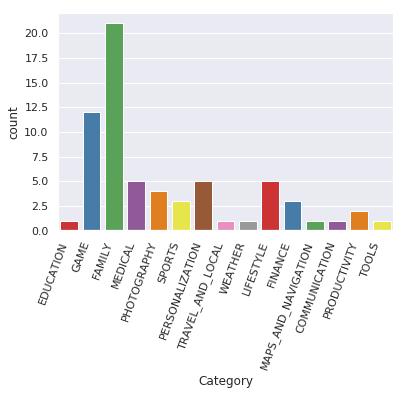

In [431]:
# Plot the category distribution of high-revenue apps.

print(temp_data.head())
gg = sns.countplot(x="Category", data=temp_data, palette = "Set1")
gg.set_xticklabels(gg.get_xticklabels(), rotation=70, ha="right")

### Explanation
The apps falls into category `FAMILY` and `GAME` still take up a large proportion. Apps in these two categories have more possibilities to earn more.

### Size of an app

Text(0.5, 1.0, 'Size VS Reviews (Rating > 4.5)')

<Figure size 720x720 with 0 Axes>

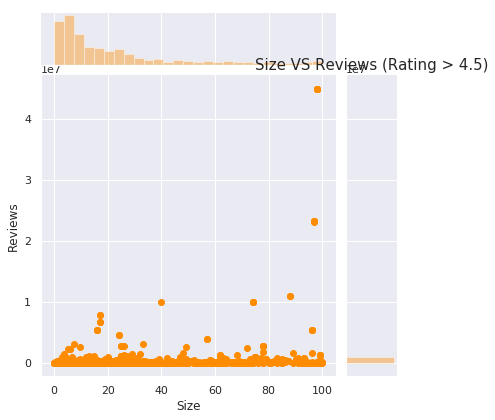

In [432]:
plt.figure(figsize = (10,10))
sns.jointplot(x="Size", y="Reviews", color = 'darkorange',data=df.loc[ (df['Rating']>4.5) ])
plt.title('Size VS Reviews (Rating > 4.5)',size = 15)

### Explanation
From the plots above, it is shown that the positive relation between sizes of apps and number of reviews is caused by outliers. There are some apps with larger sizes gets many reviews, and these few data make the correlation between reviews and sizes towards positive. The size of an app is not a main factor to be rated highly, but indeed, there are few apps with smaller sizes which have that many reviews either.

Text(0.5, 1.0, 'Size VS Rating (Rating > 4.5)')

<Figure size 720x720 with 0 Axes>

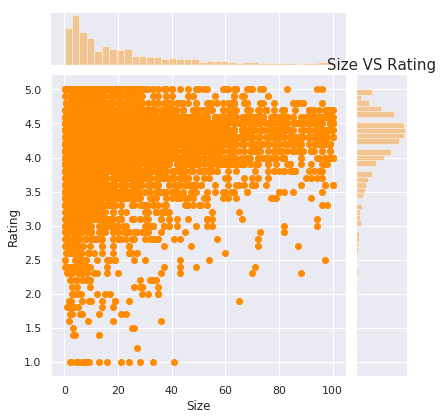

<Figure size 720x720 with 0 Axes>

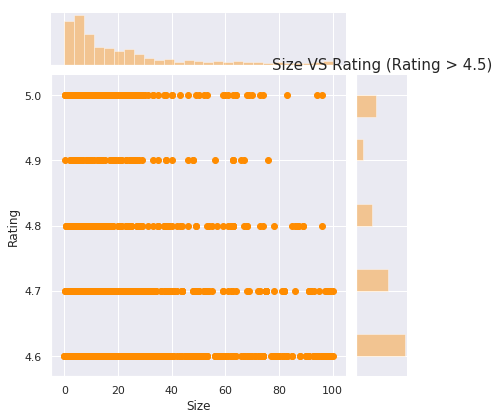

In [433]:
plt.figure(figsize = (10,10))
sns.jointplot(x="Size", y="Rating", color = 'darkorange',data=df)
plt.title('Size VS Rating',size = 15)

plt.figure(figsize = (10,10))
sns.jointplot(x="Size", y="Rating", color = 'darkorange',data=df.loc[ (df['Rating']>4.5) ])
plt.title('Size VS Rating (Rating > 4.5)',size = 15)

### Explanation
We can see from above that seldom apps with large sizes have low rates. But apps with sizes larger than 50 MB have smaller proportion in high-rating apps.

[Text(0, 0, 'AUTO_AND_VEHICLES'),
 Text(0, 0, 'BEAUTY'),
 Text(0, 0, 'BOOKS_AND_REFERENCE'),
 Text(0, 0, 'BUSINESS'),
 Text(0, 0, 'COMMUNICATION'),
 Text(0, 0, 'DATING'),
 Text(0, 0, 'EDUCATION'),
 Text(0, 0, 'ENTERTAINMENT'),
 Text(0, 0, 'EVENTS'),
 Text(0, 0, 'FINANCE'),
 Text(0, 0, 'FOOD_AND_DRINK'),
 Text(0, 0, 'HEALTH_AND_FITNESS'),
 Text(0, 0, 'HOUSE_AND_HOME'),
 Text(0, 0, 'LIBRARIES_AND_DEMO'),
 Text(0, 0, 'LIFESTYLE'),
 Text(0, 0, 'GAME'),
 Text(0, 0, 'FAMILY'),
 Text(0, 0, 'MEDICAL'),
 Text(0, 0, 'SOCIAL'),
 Text(0, 0, 'SHOPPING'),
 Text(0, 0, 'PHOTOGRAPHY'),
 Text(0, 0, 'SPORTS'),
 Text(0, 0, 'TRAVEL_AND_LOCAL'),
 Text(0, 0, 'TOOLS'),
 Text(0, 0, 'PRODUCTIVITY'),
 Text(0, 0, 'PARENTING'),
 Text(0, 0, 'WEATHER'),
 Text(0, 0, 'VIDEO_PLAYERS'),
 Text(0, 0, 'NEWS_AND_MAGAZINES'),
 Text(0, 0, 'MAPS_AND_NAVIGATION'),
 Text(0, 0, 'PERSONALIZATION')]

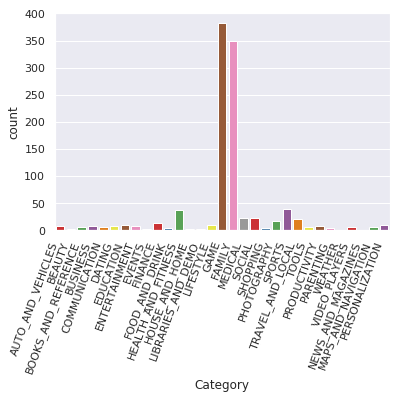

In [434]:
# Plot the category distribution of apps with larger sizes.

temp_data = df[df['Size']>50]
gg = sns.countplot(x="Category", data=temp_data, palette = "Set1")
gg.set_xticklabels(gg.get_xticklabels(), rotation=70, ha="right")

### Explanation
The plot indicates most apps with larger sizes (>50MB) belong to category `FAMILY` and `GAME` as well. So the heatmap above has shown that sizes of apps having a positive correlation with number of reviews is reasonable.

### Last Updated Time VS Rating

Text(0.5, 1.0, 'Last Updated Duration(days) VS Rating')

<Figure size 720x720 with 0 Axes>

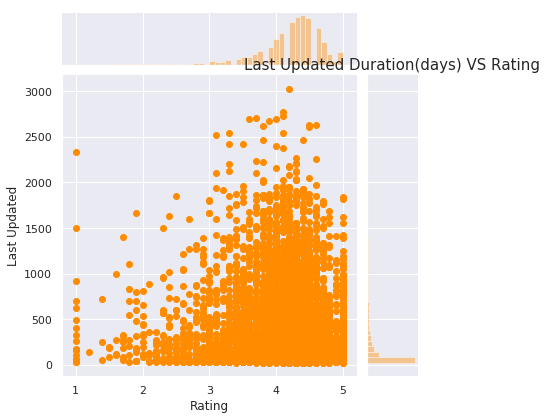

In [435]:
temp_data = df[['Rating', 'Last Updated']]
temp_data.loc[:, 'Last Updated'] = temp_data['Last Updated'].apply(lambda x: x/86400)
plt.figure(figsize = (10,10))
sns.jointplot(x="Rating", y='Last Updated', color = 'darkorange',data=temp_data)
plt.title('Last Updated Duration(days) VS Rating',size = 15)

### Explanation
(The original dataset was uploaded 7 months ago, so the `Last Updated` time is calculated from 2018/9/3)
It seems the last updated time of apps is not closely related to the ratings